# pyXRD

Neste notebook irei apresentar como usar as funções do arquivo pyXRDCodes.

Começamos importando os pacotes que usaremos

In [1]:
from pyXRD import pyXRDCodes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


Podemos criar um átomo

In [2]:
Atomos = ['Na','F']
Posicoes = [ [[0,0,0 ]], #posicoes do atomo de Na
            [[1/2,1/2,1/2]] #posicoes do atomo de F
]
#Supor que esta em célula cúbica
abc = np.array([4.614,4.614,4.614])
angulos = np.array([90,90,90])
#Definir uma simetria para o sistema
simnumb = 225 # Equivalente a F m -3 m  que é de células cúbicas
simetria =  pyXRDCodes.get_symmetry_operations_number(simnumb) #Transformar numero em uma lista com simetrias

In [3]:
simetria # so para mostar o que lista tras

['x,y,z',
 '-y,x,z',
 '-x,-y,z',
 'y,-x,z',
 'x,-y,-z',
 'y,x,-z',
 '-x,y,-z',
 '-y,-x,-z',
 'z,x,y',
 '-x,z,y',
 '-z,-x,y',
 'x,-z,y',
 'z,-x,-y',
 'x,z,-y',
 '-z,x,-y',
 '-x,-z,-y',
 'y,z,x',
 'y,-z,-x',
 'z,y,-x',
 '-y,z,-x',
 '-z,-y,-x',
 '-y,-z,x',
 'z,-y,x',
 '-z,y,x',
 '-x,-y,-z',
 'y,-x,-z',
 'x,y,-z',
 '-y,x,-z',
 '-x,y,z',
 '-y,-x,z',
 'x,-y,z',
 'y,x,z',
 '-z,-x,-y',
 'x,-z,-y',
 'z,x,-y',
 '-x,z,-y',
 '-z,x,y',
 '-x,-z,y',
 'z,-x,y',
 'x,z,y',
 '-y,-z,-x',
 '-y,z,x',
 '-z,-y,x',
 'y,-z,x',
 'z,y,x',
 'y,z,-x',
 '-z,y,-x',
 'z,-y,-x',
 'x,y+1/2,z+1/2',
 '-y,x+1/2,z+1/2',
 '-x,-y+1/2,z+1/2',
 'y,-x+1/2,z+1/2',
 'x,-y+1/2,-z+1/2',
 'y,x+1/2,-z+1/2',
 '-x,y+1/2,-z+1/2',
 '-y,-x+1/2,-z+1/2',
 'z,x+1/2,y+1/2',
 '-x,z+1/2,y+1/2',
 '-z,-x+1/2,y+1/2',
 'x,-z+1/2,y+1/2',
 'z,-x+1/2,-y+1/2',
 'x,z+1/2,-y+1/2',
 '-z,x+1/2,-y+1/2',
 '-x,-z+1/2,-y+1/2',
 'y,z+1/2,x+1/2',
 'y,-z+1/2,-x+1/2',
 'z,y+1/2,-x+1/2',
 '-y,z+1/2,-x+1/2',
 '-z,-y+1/2,-x+1/2',
 '-y,-z+1/2,x+1/2',
 'z,-y+1/2,x+1/2',

Uma vez que definimos nosso material, podemos calcular as suas posições da célula primitiva

In [4]:
Pos_primit,Pos_unit,Pos_tot = pyXRDCodes.find_atoms_unit_cell(Posicoes,abc,angulos,simetria,units=[1,1,1] )

Para mostrar o que essas posições significam podemos plotar

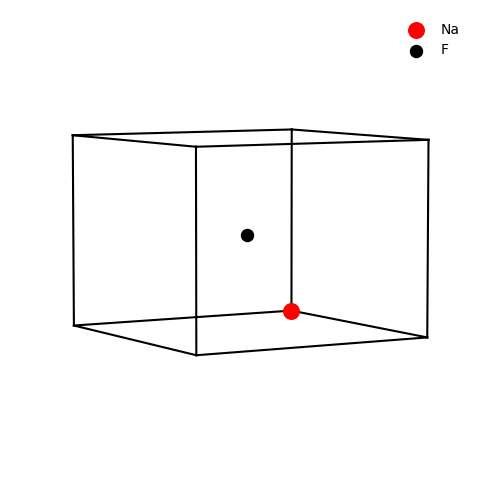

In [5]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = [25,15] #Definir tamanho dos átomos, posteriormente podemos usar o fornecido por outras funções
#Fazer plots
fig = plt.figure(figsize=(12, 6))

gs = GridSpec(1,1,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Posicoes
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=False)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)

Podemos também apresentar as duas que fizemos, as quais as posições estão agora em $(\hat{x},\hat{y},\hat{z})$

Text(0.5, 0.92, 'Posições Célula Unitária')

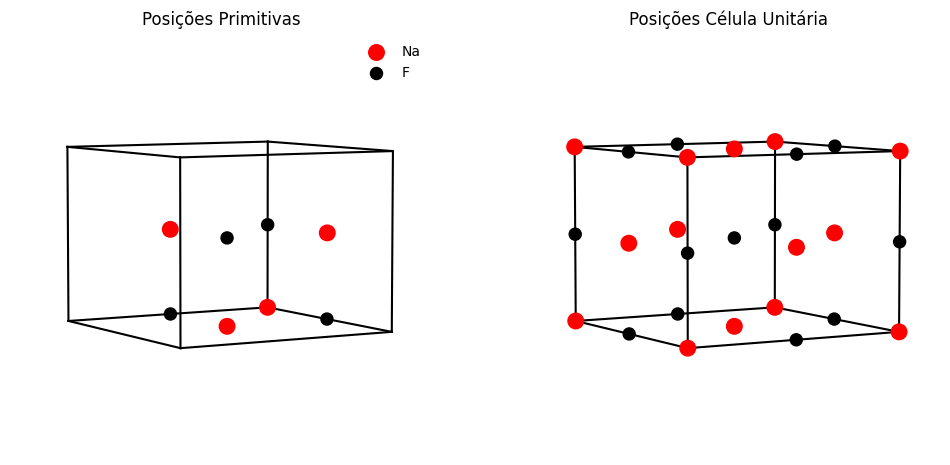

In [6]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = [25,15] #Definir tamanho dos átomos, posteriormente podemos usar o fornecido por outras funções
#Fazer plots
fig = plt.figure(figsize=(12, 12))

gs = GridSpec(1,2,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_primit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Posições Primitivas')

#Plotar célula unitaria
ax1 = fig.add_subplot(gs[1], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.set_title('Posições Célula Unitária')

#ax1.legend(frameon=False)

Com isso, podemos ir agora para calcular o padrão de difração deste material

In [7]:
lamb = 1.54 #Definindo comprimento de onda da fonte de radiação que quero ver
max_order = 10 # Ordem máxima dos h,k,l
#Primeira vez que rodar vai demorar
data = pyXRDCodes.simulate_xrd(lamb,max_order,abc,angulos,Pos_primit,Atomos)
data.keys() #Mostar o que ele tem

dict_keys(['hkls', 'two_thetas', 'FsB', 'intensities', 'G', 'multiplicities', 'Lp', 'fhkls', 'Zs'])

Com isso, podemos por exemplo pegar os dados e fazer o gráfico esperado

Text(0, 0.5, 'Intensidade')

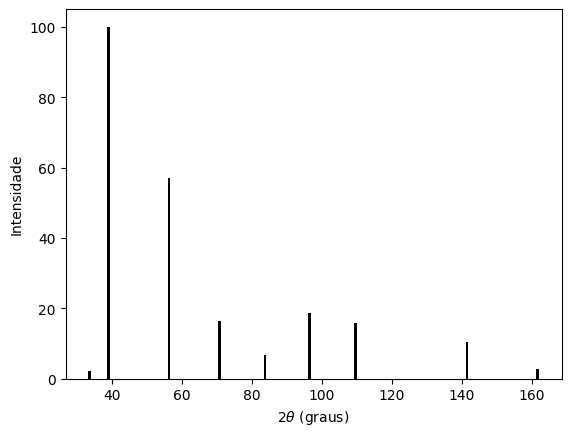

In [8]:
theta2 = data['two_thetas']
I = data['intensities']

plt.bar(theta2,I,color='black')
plt.xlabel(r'2$\theta$ (graus)')
plt.ylabel('Intensidade')

Podemos inclusive fazer gráfico dos dois lado a lado

Text(0.5, 1.0, 'Difração Calculada')

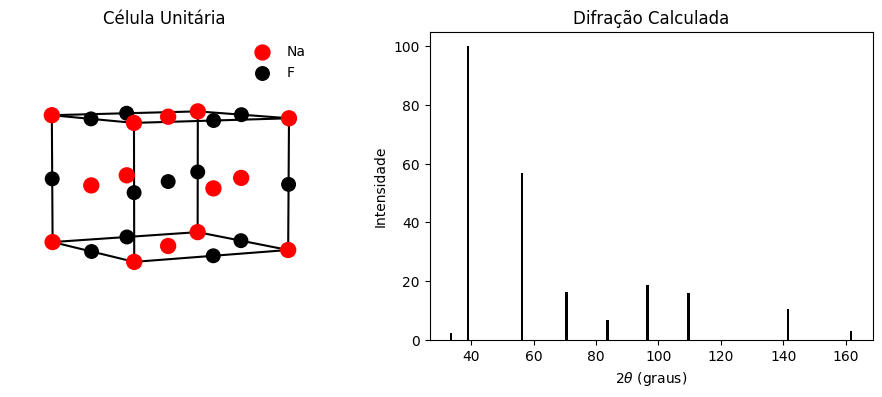

In [9]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = data['Zs'] #Usando tamanhos fornecidos no calculo da estrutura
#Fazer plots
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Célula Unitária')

#Plotar gráfico
ax1 = fig.add_subplot(gs[1])

ax1.bar(theta2,I,color='black')
ax1.set_xlabel(r'2$\theta$ (graus)')
ax1.set_ylabel('Intensidade')
ax1.set_title('Difração Calculada')

#plt.tight_layout()
#ax1.legend(frameon=False)

---

Podemos também usar CIFS que baixamos para fazer essa simulação, com o arquivo fornecido aqui só é possível do COD, porém logo posso adicionar do ICSD. 

Para isso, basta usar a função

In [10]:
#Chamar informações
abc,angulos,Posicoes,simetria,Atomos = pyXRDCodes.INFOS_COD('NaF.txt')
#Definir posições
Pos_primit,Pos_unit,Pos_tot = pyXRDCodes.find_atoms_unit_cell(Posicoes,abc,angulos,simetria,units=[1,1,1] )

Text(0.5, 0.92, 'Posições Célula Unitária')

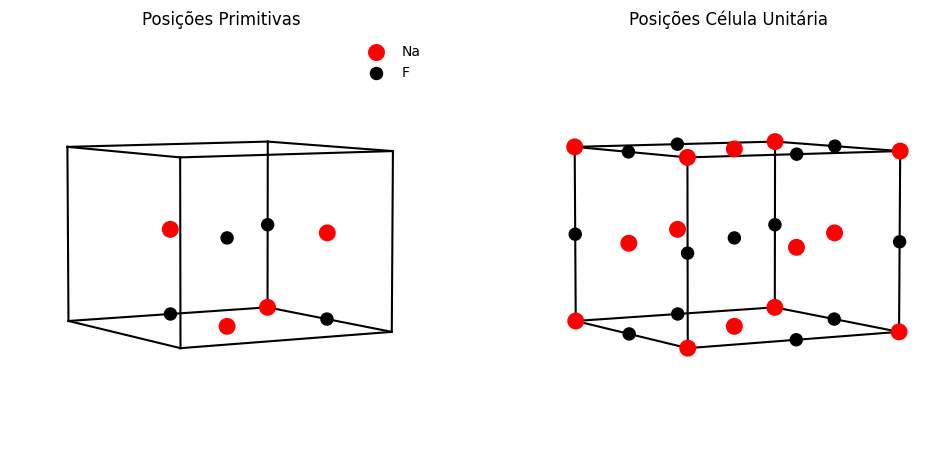

In [11]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = [25,15] #Definir tamanho dos átomos, posteriormente podemos usar o fornecido por outras funções
#Fazer plots
fig = plt.figure(figsize=(12, 12))

gs = GridSpec(1,2,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_primit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Posições Primitivas')

#Plotar célula unitaria
ax1 = fig.add_subplot(gs[1], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.set_title('Posições Célula Unitária')

#ax1.legend(frameon=False)

In [12]:
#Calcular o padrão de difração
lamb = 1.54 #Definindo comprimento de onda da fonte de radiação que quero ver
max_order = 10 # Ordem máxima dos h,k,l
data = pyXRDCodes.simulate_xrd(lamb,max_order,abc,angulos,Pos_primit,Atomos)
theta2 = data['two_thetas']
I =data['intensities']


Text(0.5, 1.0, 'Difração Calculada')

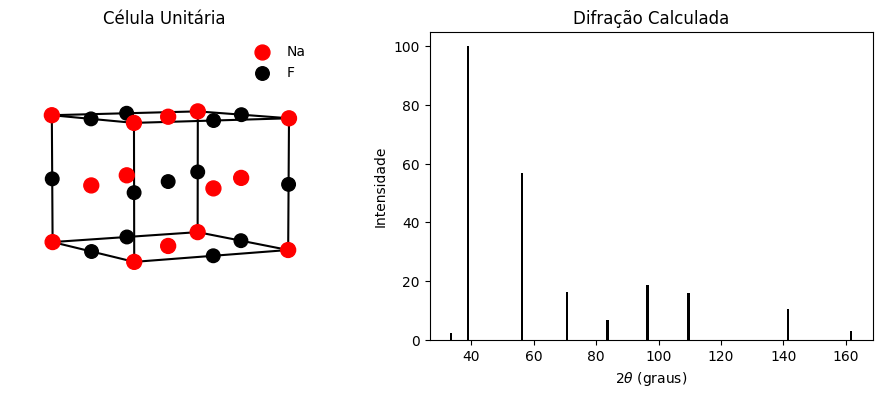

In [13]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = data['Zs'] #Usando tamanhos fornecidos no calculo da estrutura
#Fazer plots
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atomos[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Célula Unitária')

#Plotar gráfico
ax1 = fig.add_subplot(gs[1])

ax1.bar(theta2,I,color='black')
ax1.set_xlabel(r'2$\theta$ (graus)')
ax1.set_ylabel('Intensidade')
ax1.set_title('Difração Calculada')

#plt.tight_layout()
#ax1.legend(frameon=False)

Além disso, com as outras funções adicionadas podemos também mostrar os planos que estamos lidando

Text(0.5, 1.0, 'Difração Calculada')

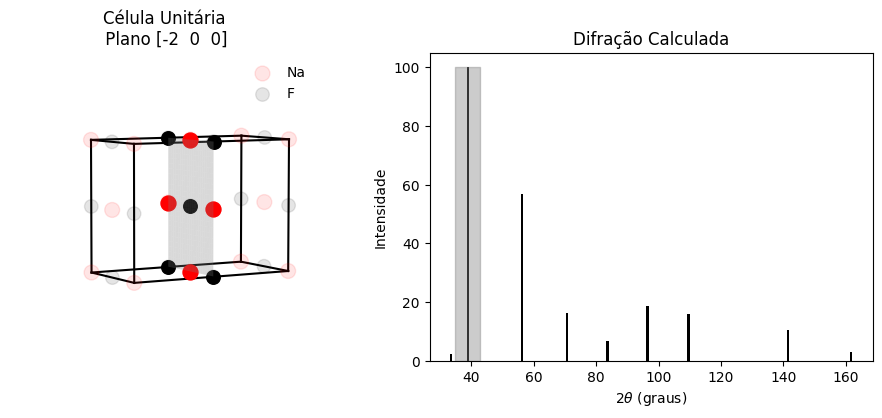

In [ ]:
hkls = data['hkls']
ff = 7 #Selecionar um hkl
#Fazer plots
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=0.1, label=f'{Atomos[i]}')
    
#Definir intervalo válido
xs = [arr[0] for sublista in POS_ideal for arr in sublista]
ys = [arr[1] for sublista in POS_ideal for arr in sublista]
zs = [arr[2] for sublista in POS_ideal for arr in sublista]
#Plotar uma superfície
X,Y,Zi = pyXRDCodes.Plot_Planes(ax1,abs(hkls[ff]),abc,angulos,1,xs = xs,ys = ys,zs =zs , color = 'gray')
#Mostrar atomos presentes
for i in range(len(POS_ideal)):
    pyXRDCodes.plot_points_on_surface(ax1 , POS_ideal[i], X,Y,Zi,5*Z[i] , cores[i],threshold=0.5) #mexer no thershold se um dos átomos não estiver aparecendo

# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angulos, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title(f'Célula Unitária\n Plano {hkls[ff]}')

#Plotar gráfico
ax1 = fig.add_subplot(gs[1])

ax1.bar(theta2,I,color='black')
ax1.fill_betweenx(np.linspace(0,100,100),theta2[ff]-4 , theta2[ff] + 4 , color = 'gray',alpha = 0.4)
ax1.set_xlabel(r'2$\theta$ (graus)')
ax1.set_ylabel('Intensidade')
ax1.set_title('Difração Calculada')

#plt.tight_layout()
#ax1.legend(frameon=False)